In [9]:
from mpl_toolkits import mplot3d

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

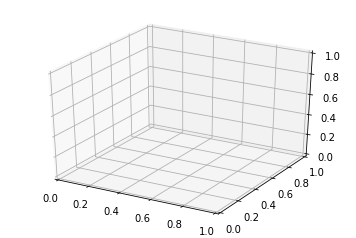

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')

### Three-Dimensional Points and Lines

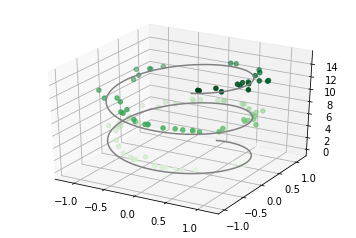

In [35]:
ax = plt.axes(projection='3d')

# data for a 3-d line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# data for three-dimensional scattered points
zdata = 15*np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn()
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')

### Three-Dimensional Contour Plots

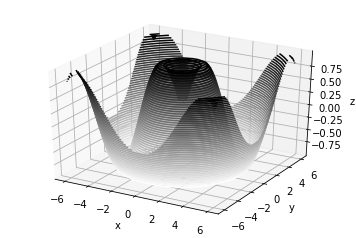

In [48]:
def f(x,y):
    return np.sin(np.sqrt(x**2 + y**2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X,Y,Z, 50, cmap='binary')

ax.set(xlabel='x', ylabel='y', zlabel='z');


__changing the ciewing angle__

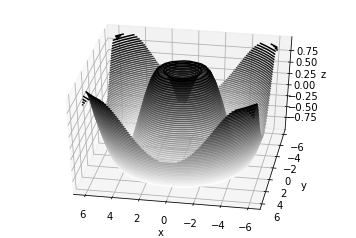

In [56]:
# 60 degrees above x-y plane, 35 degrees rotation anti-clockwise about z-axis
# i.e (elevation, azimuth)
ax.view_init(40, 100) 
fig

### Wireframes and Surface Plots

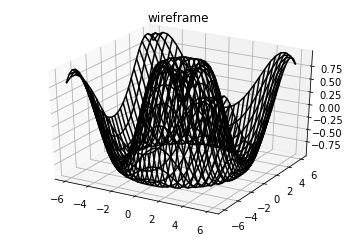

In [57]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

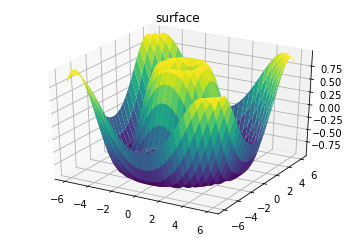

In [66]:
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1,
               cmap='viridis', edgecolor='none')
ax.set_title('surface');

__Note that though the grid of values for a surface plot needs to be two-dimensional, it need not be rectilinear__

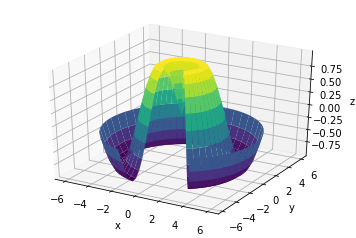

In [78]:
r = np.linspace(0,6, 20)
theta = np.linspace(-0.9*np.pi, 0.8*np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X,Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1,
               cmap='viridis', edgecolor='none');
ax.set(xlabel='x', ylabel='y', zlabel='z');


### Surface Triangulation

In [80]:
theta = 2*np.pi*np.random.random(1000)
r = 6*np.random.random(1000)
x = np.ravel(r*np.sin(theta))
y = np.ravel(r*np.cos(theta))
z = f(x,y)

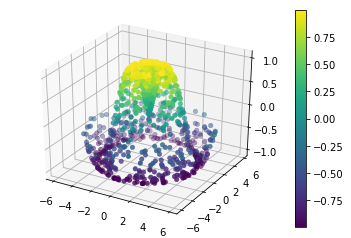

In [90]:
ax = plt.axes(projection='3d')
p = ax.scatter(x,y,z,c=z, cmap='viridis', lw=0.5);

plt.colorbar(p)

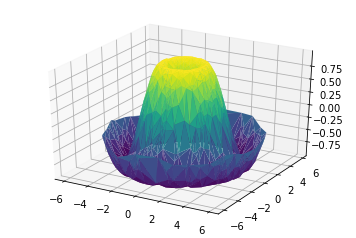

In [91]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x,y,z,
               cmap='viridis', edgecolor='none')

#### Example visualizing a Mobius Strip

Let’s call them θ, which ranges from 0 to 2π around the loop, and w which ranges from –1 to 1 across the width of the strip:

In [93]:
theta = np.linspace(0, 2*np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

In [95]:
#we must have the strip make half a twist during a full loop, or Δϕ = Δθ/2.
phi = 0.5 * theta

In [98]:
# radius in x-y plane
r = 1+w*np.cos(phi)

x = np.ravel(r*np.cos(theta))
y = np.ravel(r*np.sin(theta))
z = np.ravel(w*np.sin(phi))

[(-1, 1), (-1, 1), (-1, 1)]

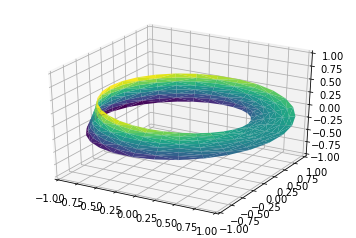

In [100]:
# triangulate in the underlying parameterization
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x,y,z, triangles=tri.triangles,
               cmap='viridis', lw=0.2);

ax.set(xlim=(-1,1), ylim=(-1,1), zlim=(-1,1));